In [256]:
import numpy as np
import xarray as xr
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import ConvLSTM2D, Flatten, Dense, Reshape, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

# Load dataset
ds_stacked = xr.open_dataset("data_SONA.nc")

# Extract desired variables
predictors = ['September', 'Oktober', 'November']
target_variable = 'AMH'
# Extract predictor and target data
predictors = np.stack([ds_stacked[var].values for var in predictors], axis=-1)
target = ds_stacked[target_variable].values

In [257]:
# Normalisasi data jika diperlukan
scaler = MinMaxScaler()
predictors_normalized = scaler.fit_transform(predictors.reshape(-1, predictors.shape[-1])).reshape(predictors.shape)
target_normalized = scaler.fit_transform(target.reshape(-1, 1)).reshape(target.shape)


In [258]:
# Pisahkan data menjadi data pelatihan dan data validasi
X_train, X_val, y_train, y_val = train_test_split(predictors_normalized, target_normalized, test_size=0.3, shuffle=False)

In [259]:
# Ubah data menjadi format ConvLSTM
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1], X_train.shape[2], X_train.shape[3])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1], X_val.shape[2], X_val.shape[3])

Efisien tp perlu epoch banyak

In [65]:
# # Build ConvLSTM model
# model = Sequential([
#     ConvLSTM2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4])),
#     Dropout(0.2),  # Add dropout after each ConvLSTM layer
#     ConvLSTM2D(32, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=False),
#     Dropout(0.2),
#     Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Flatten(),
#     Dense(units=64, activation='relu'),
#     Dense(units=40*44, activation='relu'),
#     Reshape((40, 44))
# ])

Medium

In [275]:
# Build ConvLSTM model
model = Sequential([
    ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4])),
    Dropout(0.2),  # Add dropout after each ConvLSTM layer
    ConvLSTM2D(64, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=False),
    Dropout(0.2),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=40*44, activation='relu'),
    Reshape((40, 44))
])

In [ ]:
# Build ConvLSTM model
model = Sequential([
    ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4])),
    Dropout(0.2),  # Add dropout after each ConvLSTM layer
    ConvLSTM2D(64, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=False),
    Dropout(0.2),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=40*44, activation='relu'),
    Reshape((40, 44))
])

Medium 2

In [260]:
# # Build the ConvLSTM model
# model = Sequential([
#     ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4])),
#     Dropout(0.2),
#     BatchNormalization(),
    
#     ConvLSTM2D(64, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=False),
#     Dropout(0.2),
#     BatchNormalization(),
    
#     Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.2),
#     BatchNormalization(),
    
#     Flatten(),
#     Dense(units=128, activation='relu'),
#     Dropout(0.2),
#     Dense(units=40*44, activation='relu'),
#     Reshape((40, 44))
# ])

With tanh and sigmoid

In [170]:
# # Build a more complex ConvLSTM model with tanh and sigmoid activations
# model = Sequential([
#     ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='tanh', padding='same', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4])),
#     BatchNormalization(),
#     Dropout(0.3),
    
#     ConvLSTM2D(128, kernel_size=(3, 3), activation='tanh', padding='same', return_sequences=False),
#     BatchNormalization(),
#     Dropout(0.3),
    
#     Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.3),
    
#     Flatten(),
#     Dense(units=256, activation='relu'),
#     Dropout(0.3),
#     Dense(units=40*44, activation='sigmoid'),
#     Reshape((40, 44))
# ])

with ReLu

In [185]:
# # Build a more complex ConvLSTM model
# model = Sequential([
#     ConvLSTM2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4])),
#     BatchNormalization(),
#     Dropout(0.3),
    
#     ConvLSTM2D(128, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=False),
#     BatchNormalization(),
#     Dropout(0.3),
    
#     Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.3),
    
#     Flatten(),
#     Dense(units=256, activation='relu'),
#     Dropout(0.3),
#     Dense(units=40*44, activation='linear'),
#     Reshape((40, 44))
# ])

In [241]:
# Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [261]:
# # Kompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

In [287]:
# Train the model
model.fit(X_train, y_train, epochs=3000, batch_size=16, validation_split=0.2)

Epoch 1/3000
2/2 [==============================] - 14s 1s/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 2/3000
2/2 [==============================] - 3s 1s/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 3/3000
2/2 [==============================] - 3s 1s/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 4/3000
2/2 [==============================] - 3s 1s/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0376 - val_mse: 0.0376
Epoch 5/3000
2/2 [==============================] - 2s 941ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 6/3000
2/2 [==============================] - 2s 689ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0379 - val_mse: 0.0379
Epoch 7/3000
2/2 [==============================] - 2s 974ms/step - loss: 0.0061 - mse: 0.0061 - val_loss: 0.0380 - val_mse: 0.0380
Epoch 8/3000
2/2 [==============================] - 2s 639ms/step - loss: 0.0061 - mse:

KeyboardInterrupt: 

In [ ]:
# Latih model
# model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


In [277]:
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_56 (ConvLSTM2D  (None, 1, 40, 44, 32)     40448     
 )                                                               
                                                                 
 dropout_51 (Dropout)        (None, 1, 40, 44, 32)     0         
                                                                 
 conv_lstm2d_57 (ConvLSTM2D  (None, 40, 44, 64)        221440    
 )                                                               
                                                                 
 dropout_52 (Dropout)        (None, 40, 44, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 40, 44, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 20, 22, 64)      

In [255]:
# Menyimpan model
model.save('ConvLSTM_modelmedium1.keras')

In [276]:
from keras.models import load_model

# Memuat model yang telah disimpan
model = load_model('ConvLSTM_modelmedium1.keras')

In [278]:
# Evaluate the model
loss, mse = model.evaluate(X_val, y_val)
print(f'Evaluation Loss: {loss}, MSE: {mse}')

1/1 [==============================] - 4s 4s/step - loss: 0.0380 - mse: 0.0380
Evaluation Loss: 0.0380273200571537, MSE: 0.0380273200571537


In [263]:
# Evaluate model
loss = model.evaluate(X_val, y_val)
print(f'Evaluation Loss: {loss}')

1/1 [==============================] - 0s 262ms/step - loss: 0.0300
Evaluation Loss: 0.030046872794628143


In [279]:
# Make predictions
predictions = model.predict(X_val)

1/1 [==============================] - 4s 4s/step


In [280]:
predictions = scaler.inverse_transform(predictions.reshape(-1, 1)).flatten()
actual_values = scaler.inverse_transform(y_val.reshape(-1, 1)).flatten()

In [281]:
# Ubah dimensi hasil prediksi menjadi (13, 40, 44)
predictions_reshaped = predictions.reshape(13, 40, 44)
actual_values_reshaped = actual_values.reshape(13, 40, 44)

In [193]:
rmse = np.sqrt(((predictions-actual_values)**2).mean())
rmse

3420.584874705928

In [282]:
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats

# Menghitung RMSE
rmse = np.sqrt(mean_squared_error(actual_values, predictions))
print(f'RMSE: {rmse}')

# Menghitung R-squared (R^2)
r2 = r2_score(actual_values, predictions)
print(f'R^2: {r2}')

# Menghitung koefisien korelasi (R)
# correlation_matrix = np.corrcoef(actual_values.reshape(-1), predictions.reshape(-1))
correlation_coefficient = np.corrcoef(actual_values, predictions)[0, 1]
print(f'Correlation coefficient (R): {correlation_coefficient}')

RMSE: 29.64090312746126
R^2: -0.2488778979174724
Correlation coefficient (R): 0.34212722421045805


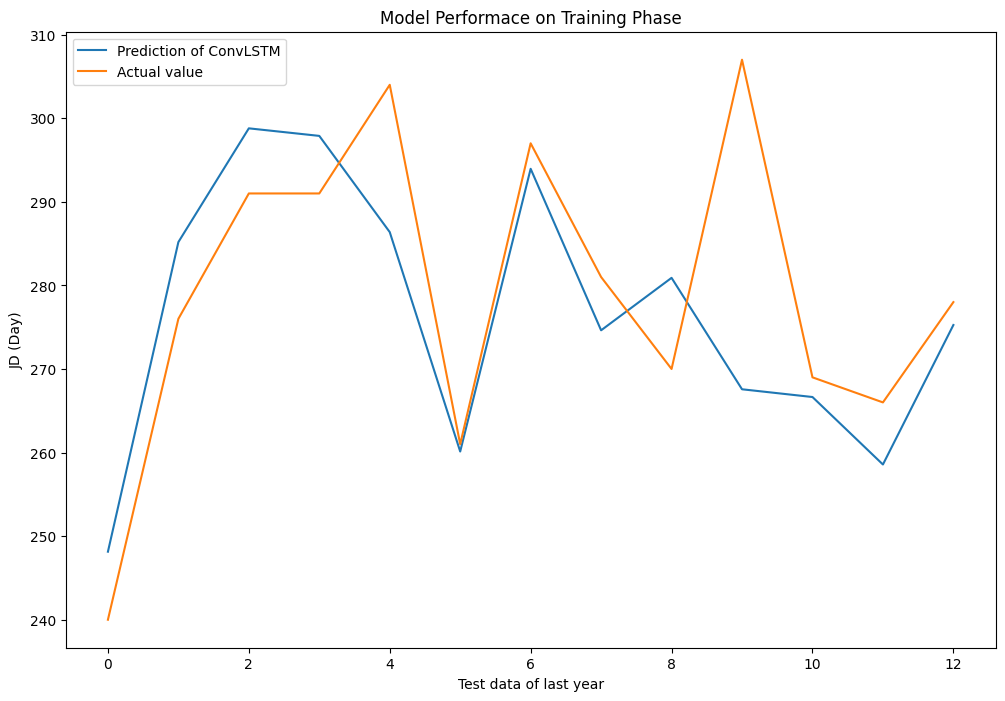

In [283]:
import matplotlib.pyplot as plt
#See the model performance on test dataset
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(predictions_reshaped[:,22,20], label='Prediction of ConvLSTM')
plt.plot(actual_values_reshaped[:,22,20], label='Actual value')
plt.legend(loc ="upper left")
plt.title('Model Performace on Training Phase')
plt.xlabel('Test data of last year')
plt.ylabel('JD (Day)')
plt.show()

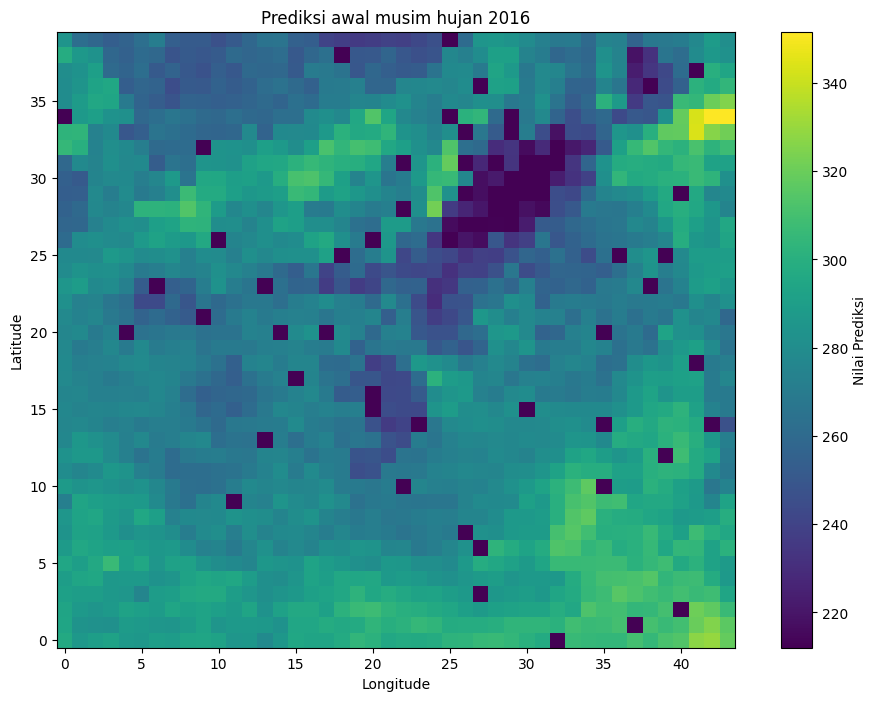

In [285]:
years = np.arange(2011, 2024) 
# Misalkan Anda memiliki array hasil prediksi dengan dimensi (13, 40, 44)
predictions_with_info = predictions_reshaped

# Pilih tahun tertentu (misalnya tahun ke-0)
year_index = 5
predictions_year = predictions_with_info[year_index]

# Buat plot spasial
plt.imshow(predictions_year, cmap='viridis')  # Ubah colormap sesuai kebutuhan
plt.colorbar(label='Nilai Prediksi')
plt.title('Prediksi awal musim hujan {}'.format(years[year_index]))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().invert_yaxis()
plt.show()

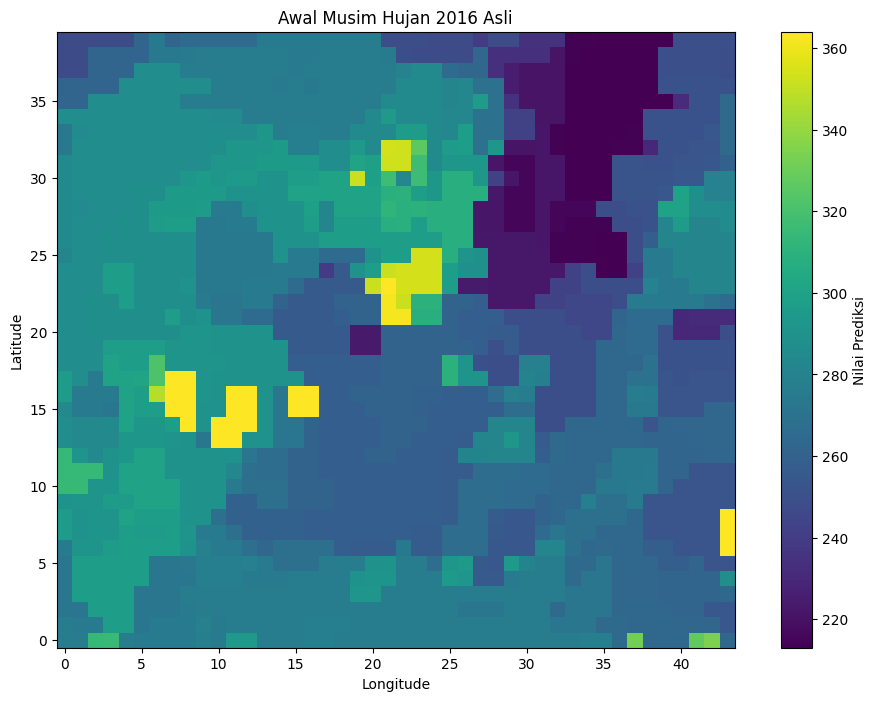

In [286]:
years = np.arange(2011, 2024) 
# Misalkan Anda memiliki array hasil prediksi dengan dimensi (13, 40, 44)
Actual = actual_values_reshaped

# Pilih tahun tertentu (misalnya tahun ke-0)
year_index = 5
Actual_year = Actual[year_index]

# Buat plot spasial
plt.imshow(Actual_year, cmap='viridis')  # Ubah colormap sesuai kebutuhan
plt.colorbar(label='Nilai Prediksi')
plt.title('Awal Musim Hujan {} Asli'.format(years[year_index]))
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.gca().invert_yaxis()
plt.show()

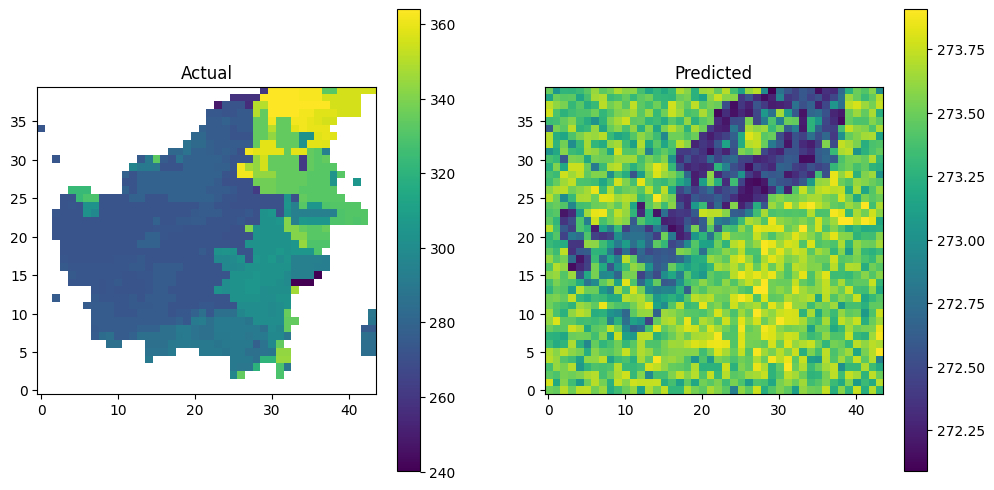

In [355]:
# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Actual')
plt.imshow(y_val_denorm[0], cmap='viridis')
plt.colorbar()
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.title('Predicted')
plt.imshow(predictions_denorm[0], cmap='viridis')
plt.colorbar()
plt.gca().invert_yaxis()

plt.show()

In [609]:
from keras.models import load_model

# Memuat model yang telah disimpan
model = load_model('ConvLSTM_modelNAN.keras')

In [14]:
import numpy as np
import pandas as pd
import xarray as xr
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, LSTM, ConvLSTM2D, Reshape
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
# Load data (gantilah dengan path dan nama variabel yang sesuai)
ds = xr.open_dataset("Musim_TR_NAN_FIX.nc")
# data_variable = ds[['Juni','Juli','Agustus','September', 'Oktober', 'November', 'AMH']].to_array().values  # Gantilah 'your_variable' dengan nama variabel yang sesuai
# data = np.array(data_variable).transpose(1, 2, 3, 0)  # Transpose untuk mendapatkan shape (time, lat, lon, vars)

# Extract variables
var1 = ds['Juni'].values
var2 = ds['Juli'].values
var3 = ds['Agustus'].values
var4 = ds['September'].values
var5 = ds['Oktober'].values
var6 = ds['November'].values
var7 = ds['TJuni'].values
var8 = ds['TJuli'].values
var9 = ds['TAgustus'].values
var10 = ds['TMAM'].values
var11 = ds['TJJA'].values
var12 = ds['JJA'].values
var13 = ds['SON'].values
var14 = ds['AMH'].values


# Buat mask untuk grid NaN pada variabel keempat
mask_nan_var7 = np.isnan(var14)


# Apply mask to the other variables
var1[mask_nan_var7] = np.nan
var2[mask_nan_var7] = np.nan
var3[mask_nan_var7] = np.nan
var4[mask_nan_var7] = np.nan
var5[mask_nan_var7] = np.nan
var6[mask_nan_var7] = np.nan
var7[mask_nan_var7] = np.nan
var8[mask_nan_var7] = np.nan
var9[mask_nan_var7] = np.nan
var10[mask_nan_var7] = np.nan
var11[mask_nan_var7] = np.nan
var12[mask_nan_var7] = np.nan
var13[mask_nan_var7] = np.nan

In [15]:
# Stack variables along a new axis (features axis)
# data = np.stack([var1, var2, var3, var4, var5, var6, var7, var8, var9, var14], axis=-1)
data = np.stack([var1, var2, var3, var7, var8, var9, var14], axis=-1)
# data = np.stack([var10, var11, var12, var13,var14], axis=-1)

# Mengganti nilai NaN dengan nilai khusus (misalnya -9999)
nan_mask = np.isnan(data)
data_with_mask = np.nan_to_num(data, nan=0)

# Split data into predictors and target
predictors = data_with_mask[..., :-1]  # All variables except the last one
target = data_with_mask[..., -1]  # The last variable is the target

In [16]:
import tensorflow as tf

np.random.seed(42)
tf.random.set_seed(42)

In [17]:
# Normalisasi data
scaler_x = MinMaxScaler()
predictors_normalized = scaler_x.fit_transform(predictors.reshape(-1, predictors.shape[-1]))

scaler_y = MinMaxScaler()
target_normalized = scaler_y.fit_transform(target.reshape(-1, 1)).reshape(target.shape)

In [18]:
from sklearn.decomposition import PCA

# Bentuk data untuk CNN (samples, height, width, channels)
X = predictors_normalized
# target_normalized = target_normalized.reshape(-1)

pca=PCA(0.99)
predictors_pca = pca.fit_transform(X)
predictors_pca= predictors_pca.reshape(43,40,44,predictors_pca.shape[1])
# # Split data into train and test sets
# X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(predictors_pca, y, test_size=0.302325,shuffle=False)
# X_train_scaled = X_train.reshape(X_train.shape[0],1,X_train.shape[1])
# X_test_scaled = X_test.reshape(X_test.shape[0],1,X_test.shape[1])

In [19]:
# # Prepare data for LSTM with time steps
n_steps = 1  # Using data from one year to predict the next year
# Create sequences of data
X = []
y = []

for i in range(len(predictors_pca) - n_steps):
    for lat in range(predictors_pca.shape[1]):
        for lon in range(predictors_pca.shape[2]):
            X.append(predictors_pca[i:i+n_steps, lat, lon, :])
            y.append(target_normalized[i+n_steps, lat, lon])

X = np.array(X)
y = np.array(y)

# Reshape data for LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], n_steps,X.shape[2]))

In [22]:
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size=0.285714, shuffle=False, random_state=42)

In [23]:
X_test.shape

(21120, 1, 3)

In [53]:
# Build the ConvLSTM model
model = Sequential([
    ConvLSTM2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4])),
    Dropout(0.2),
    BatchNormalization(),
    
    ConvLSTM2D(64, kernel_size=(3, 3), activation='relu', padding='same', return_sequences=False),
    Dropout(0.2),
    BatchNormalization(),
    
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    BatchNormalization(),
    
    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.2),
    Dense(units=40*44, activation='relu'),
    Reshape((40, 44))
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Use EarlyStopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [41]:
from keras.models import Sequential
from keras.layers import ConvLSTM2D, Flatten, Dense, Reshape, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# Build ConvLSTM model
model = Sequential([
    ConvLSTM2D(filters=16, kernel_size=(3, 3), activation='tanh', padding='same', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3], X_train.shape[4])),
    Dropout(0.5),  # Add dropout after each ConvLSTM layer
    ConvLSTM2D(32, kernel_size=(3, 3), activation='tanh', padding='same', return_sequences=False),
    Dropout(0.5),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=40*44, activation='sigmoid'),
    Reshape((40, 44))
])

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Use EarlyStopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [42]:
# Train the model LSTM
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping])   

Epoch 1/100
2/2 [==============================] - 118s 12s/step - loss: 0.1765 - accuracy: 0.0250 - val_loss: 0.1756 - val_accuracy: 0.0375
Epoch 2/100
2/2 [==============================] - 3s 2s/step - loss: 0.1749 - accuracy: 0.0469 - val_loss: 0.1726 - val_accuracy: 0.0375
Epoch 3/100
2/2 [==============================] - 2s 962ms/step - loss: 0.1682 - accuracy: 0.0448 - val_loss: 0.1621 - val_accuracy: 0.0417
Epoch 4/100
2/2 [==============================] - 3s 2s/step - loss: 0.1493 - accuracy: 0.0458 - val_loss: 0.1356 - val_accuracy: 0.0417
Epoch 5/100
2/2 [==============================] - 3s 1s/step - loss: 0.1108 - accuracy: 0.0552 - val_loss: 0.0887 - val_accuracy: 0.0417
Epoch 6/100
2/2 [==============================] - 1s 575ms/step - loss: 0.0618 - accuracy: 0.0573 - val_loss: 0.0410 - val_accuracy: 0.0458
Epoch 7/100
2/2 [==============================] - 3s 2s/step - loss: 0.0292 - accuracy: 0.0625 - val_loss: 0.0214 - val_accuracy: 0.0625
Epoch 8/100
2/2 [========

In [616]:
# # Add time dimension (assuming time_steps as the first dimension) shape fpr lstm
# X_train_scaled = X_train.reshape(X_train.shape[0]*X_train.shape[2]*X_train.shape[3], 1, X_train.shape[4])
# X_test_scaled = X_test.reshape(X_test.shape[0]*X_test.shape[2]*X_test.shape[3], 1, X_test.shape[4])
# y_train_scaled = y_train.reshape(y_train.shape[0]*y_train.shape[1]*y_train.shape[2])
# y_test_scaled = y_test.reshape(y_test.shape[0]*y_test.shape[1]*y_test.shape[2])

In [34]:
from keras.optimizers import Adam
from keras.layers import Bidirectional, LSTM
model = Sequential([
    LSTM(32, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.5),
    BatchNormalization(),
    
    LSTM(16, activation='tanh', return_sequences=True),
    Dropout(0.5),
    BatchNormalization(),
    
    Dense(128, activation='relu', kernel_regularizer='l2'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Use EarlyStopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [73]:
from tensorflow.keras.regularizers import l2

# Membangun model LSTM yang lebih kompleks dengan lebih banyak dropout dan regulasi L2
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2]), kernel_regularizer=l2(0.01), activation='tanh'))
model.add(Dropout(0.3))
model.add(LSTM(units=32, return_sequences=True, kernel_regularizer=l2(0.01), activation='tanh'))
model.add(Dropout(0.3))
model.add(LSTM(units=32, return_sequences=False, kernel_regularizer=l2(0.01), activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

# Use EarlyStopping to stop training when validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [88]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
660/660 [==============================] - 50s 16ms/step - loss: 0.2629 - accuracy: 0.4037 - val_loss: 0.1787 - val_accuracy: 0.4518
Epoch 2/50
660/660 [==============================] - 5s 8ms/step - loss: 0.1504 - accuracy: 0.4523 - val_loss: 0.1104 - val_accuracy: 0.4518
Epoch 3/50
660/660 [==============================] - 5s 8ms/step - loss: 0.0947 - accuracy: 0.4529 - val_loss: 0.0680 - val_accuracy: 0.4518
Epoch 4/50
660/660 [==============================] - 5s 7ms/step - loss: 0.0585 - accuracy: 0.4530 - val_loss: 0.0407 - val_accuracy: 0.4518
Epoch 5/50
660/660 [==============================] - 5s 7ms/step - loss: 0.0358 - accuracy: 0.4531 - val_loss: 0.0246 - val_accuracy: 0.4518
Epoch 6/50
660/660 [==============================] - 5s 7ms/step - loss: 0.0231 - accuracy: 0.4531 - val_loss: 0.0159 - val_accuracy: 0.4518
Epoch 7/50
660/660 [==============================] - 5s 7ms/step - loss: 0.0163 - accuracy: 0.4531 - val_loss: 0.0117 - val_accuracy: 0.4518
Epoc

In [35]:
# Train the model LSTM
history = model.fit(X_train, y_train_scaled, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])   
# history = model.fit(X_train_scaled, y_train_scaled, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
660/660 [==============================] - 114s 11ms/step - loss: 0.3730 - accuracy: 0.3197 - val_loss: 0.2909 - val_accuracy: 0.0799
Epoch 2/100
660/660 [==============================] - 5s 8ms/step - loss: 0.2465 - accuracy: 0.3222 - val_loss: 0.2170 - val_accuracy: 0.4369
Epoch 3/100
660/660 [==============================] - 6s 9ms/step - loss: 0.1974 - accuracy: 0.3795 - val_loss: 0.1893 - val_accuracy: 0.4369
Epoch 4/100
660/660 [==============================] - 6s 8ms/step - loss: 0.1808 - accuracy: 0.4295 - val_loss: 0.1811 - val_accuracy: 0.4369
Epoch 5/100
660/660 [==============================] - 6s 9ms/step - loss: 0.1764 - accuracy: 0.4369 - val_loss: 0.1791 - val_accuracy: 0.4369
Epoch 6/100
660/660 [==============================] - 5s 8ms/step - loss: 0.1755 - accuracy: 0.4369 - val_loss: 0.1787 - val_accuracy: 0.4369
Epoch 7/100
660/660 [==============================] - 6s 9ms/step - loss: 0.1754 - accuracy: 0.4369 - val_loss: 0.1787 - val_accuracy: 0.4

In [526]:
#Menyimpan model
model.save('LSTM_0,001.keras')

In [36]:
# Evaluate the model
loss = model.evaluate(X_test, y_test_scaled)
print(f'Test Loss: {loss}')

660/660 [==============================] - 5s 3ms/step - loss: 0.1754 - accuracy: 0.4369
Test Loss: [0.1753673553466797, 0.4369318187236786]


In [37]:
# Make predictions
predictions = model.predict(X_test)

660/660 [==============================] - 5s 4ms/step


In [45]:
y_train_scaled.shape

(52800,)

In [40]:
# Denormalize predictions and actual values
predictions_denormalized = scaler_y.inverse_transform(predictions.reshape(-1, 1)).reshape(predictions.shape)
y_test_denormalized = scaler_y.inverse_transform(y_test_scaled.reshape(-1, 1)).reshape(y_test_scaled.shape)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_denormalized.flatten(), predictions_denormalized.flatten()))
print(f'RMSE: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test_denormalized.flatten(), predictions_denormalized.flatten())
print(f'R^2: {r2}')

# Calculate Pearson correlation coefficient (r)
correlation_coefficient, _ = pearsonr(y_test_denormalized.flatten(), predictions_denormalized.flatten())
print(f'Pearson Correlation Coefficient: {correlation_coefficient}')

# Mask out zero values in y_test_denormalized
non_zero_mask = y_test_scaled != 0

# Filter predictions and actual values based on the mask
filtered_predictions = predictions_denormalized[non_zero_mask]
filtered_y_test = y_test_denormalized[non_zero_mask]

# Calculate MAPE using the filtered data
mape = np.mean(np.abs((filtered_y_test - filtered_predictions) / filtered_y_test)) * 100
print(f'MAPE:{mape:.2f}%')

RMSE: 139.2756378519139
R^2: 0.0033825907740414607
Pearson Correlation Coefficient: 0.8021995520163343
MAPE:41.56%


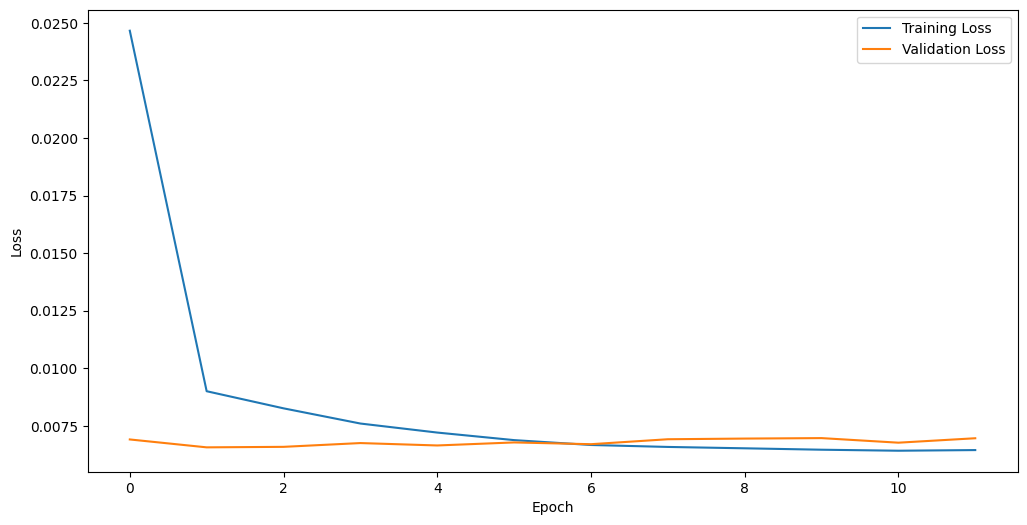

In [83]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ValueError: x and y can be no greater than 2D, but have shapes (21120,) and (21120, 1, 1)

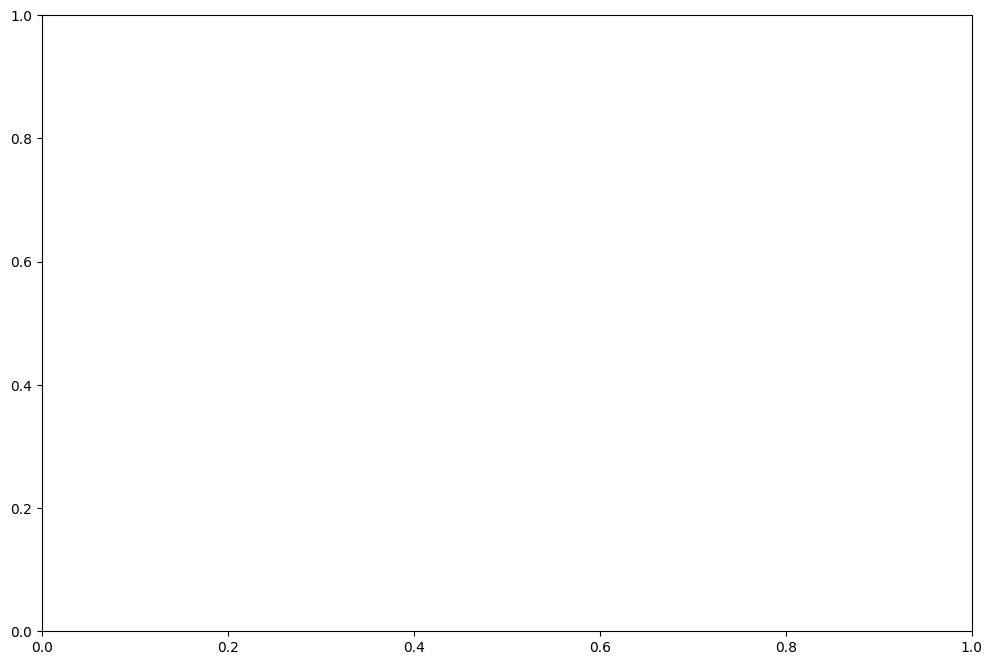

In [41]:
# Mengganti nilai di bawah 0 menjadi NaN
predictions_denormalized[predictions_denormalized < 100] = np.nan
y_test_denormalized[y_test_denormalized < 100] = np.nan
import matplotlib.pyplot as plt
#See the model performance on test dataset
plt.rcParams['figure.figsize'] = (12,8)
plt.plot(predictions_denormalized, label='Prediction of ConvLSTM')
# plt.plot(y_test_denormalized, label='Actual value')
plt.legend(loc ="upper left")
plt.title('Model Performace on Training Phase')
plt.xlabel('Test data of last year')
plt.ylabel('JD (Day)')
plt.show()

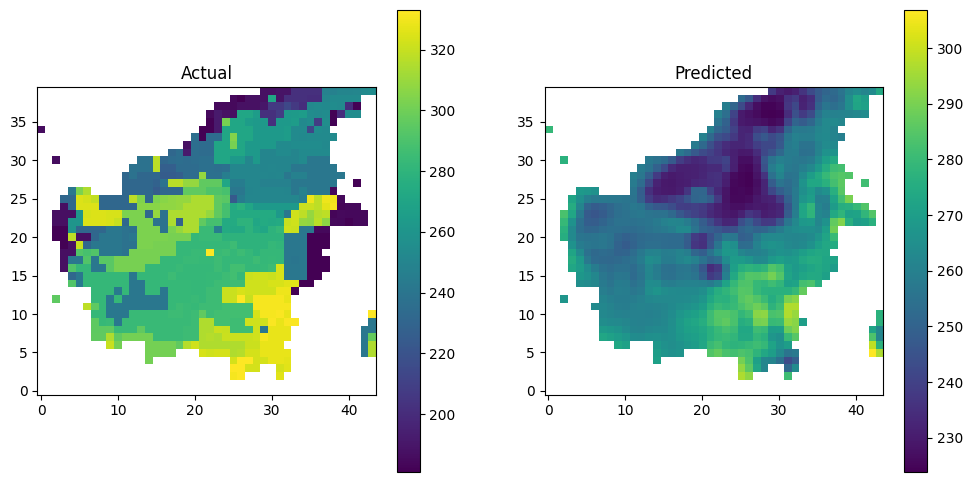

In [105]:
y_test_denormalized = y_test_denormalized.reshape(13,40,44)
predictions_denormalized = predictions_denormalized.reshape(13,40,44)
# Plot results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Actual')
plt.imshow(y_test_denormalized[9], cmap='viridis')
plt.colorbar()
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)
plt.title('Predicted')
plt.imshow(predictions_denormalized[9], cmap='viridis')
plt.colorbar()
plt.gca().invert_yaxis()

plt.show()

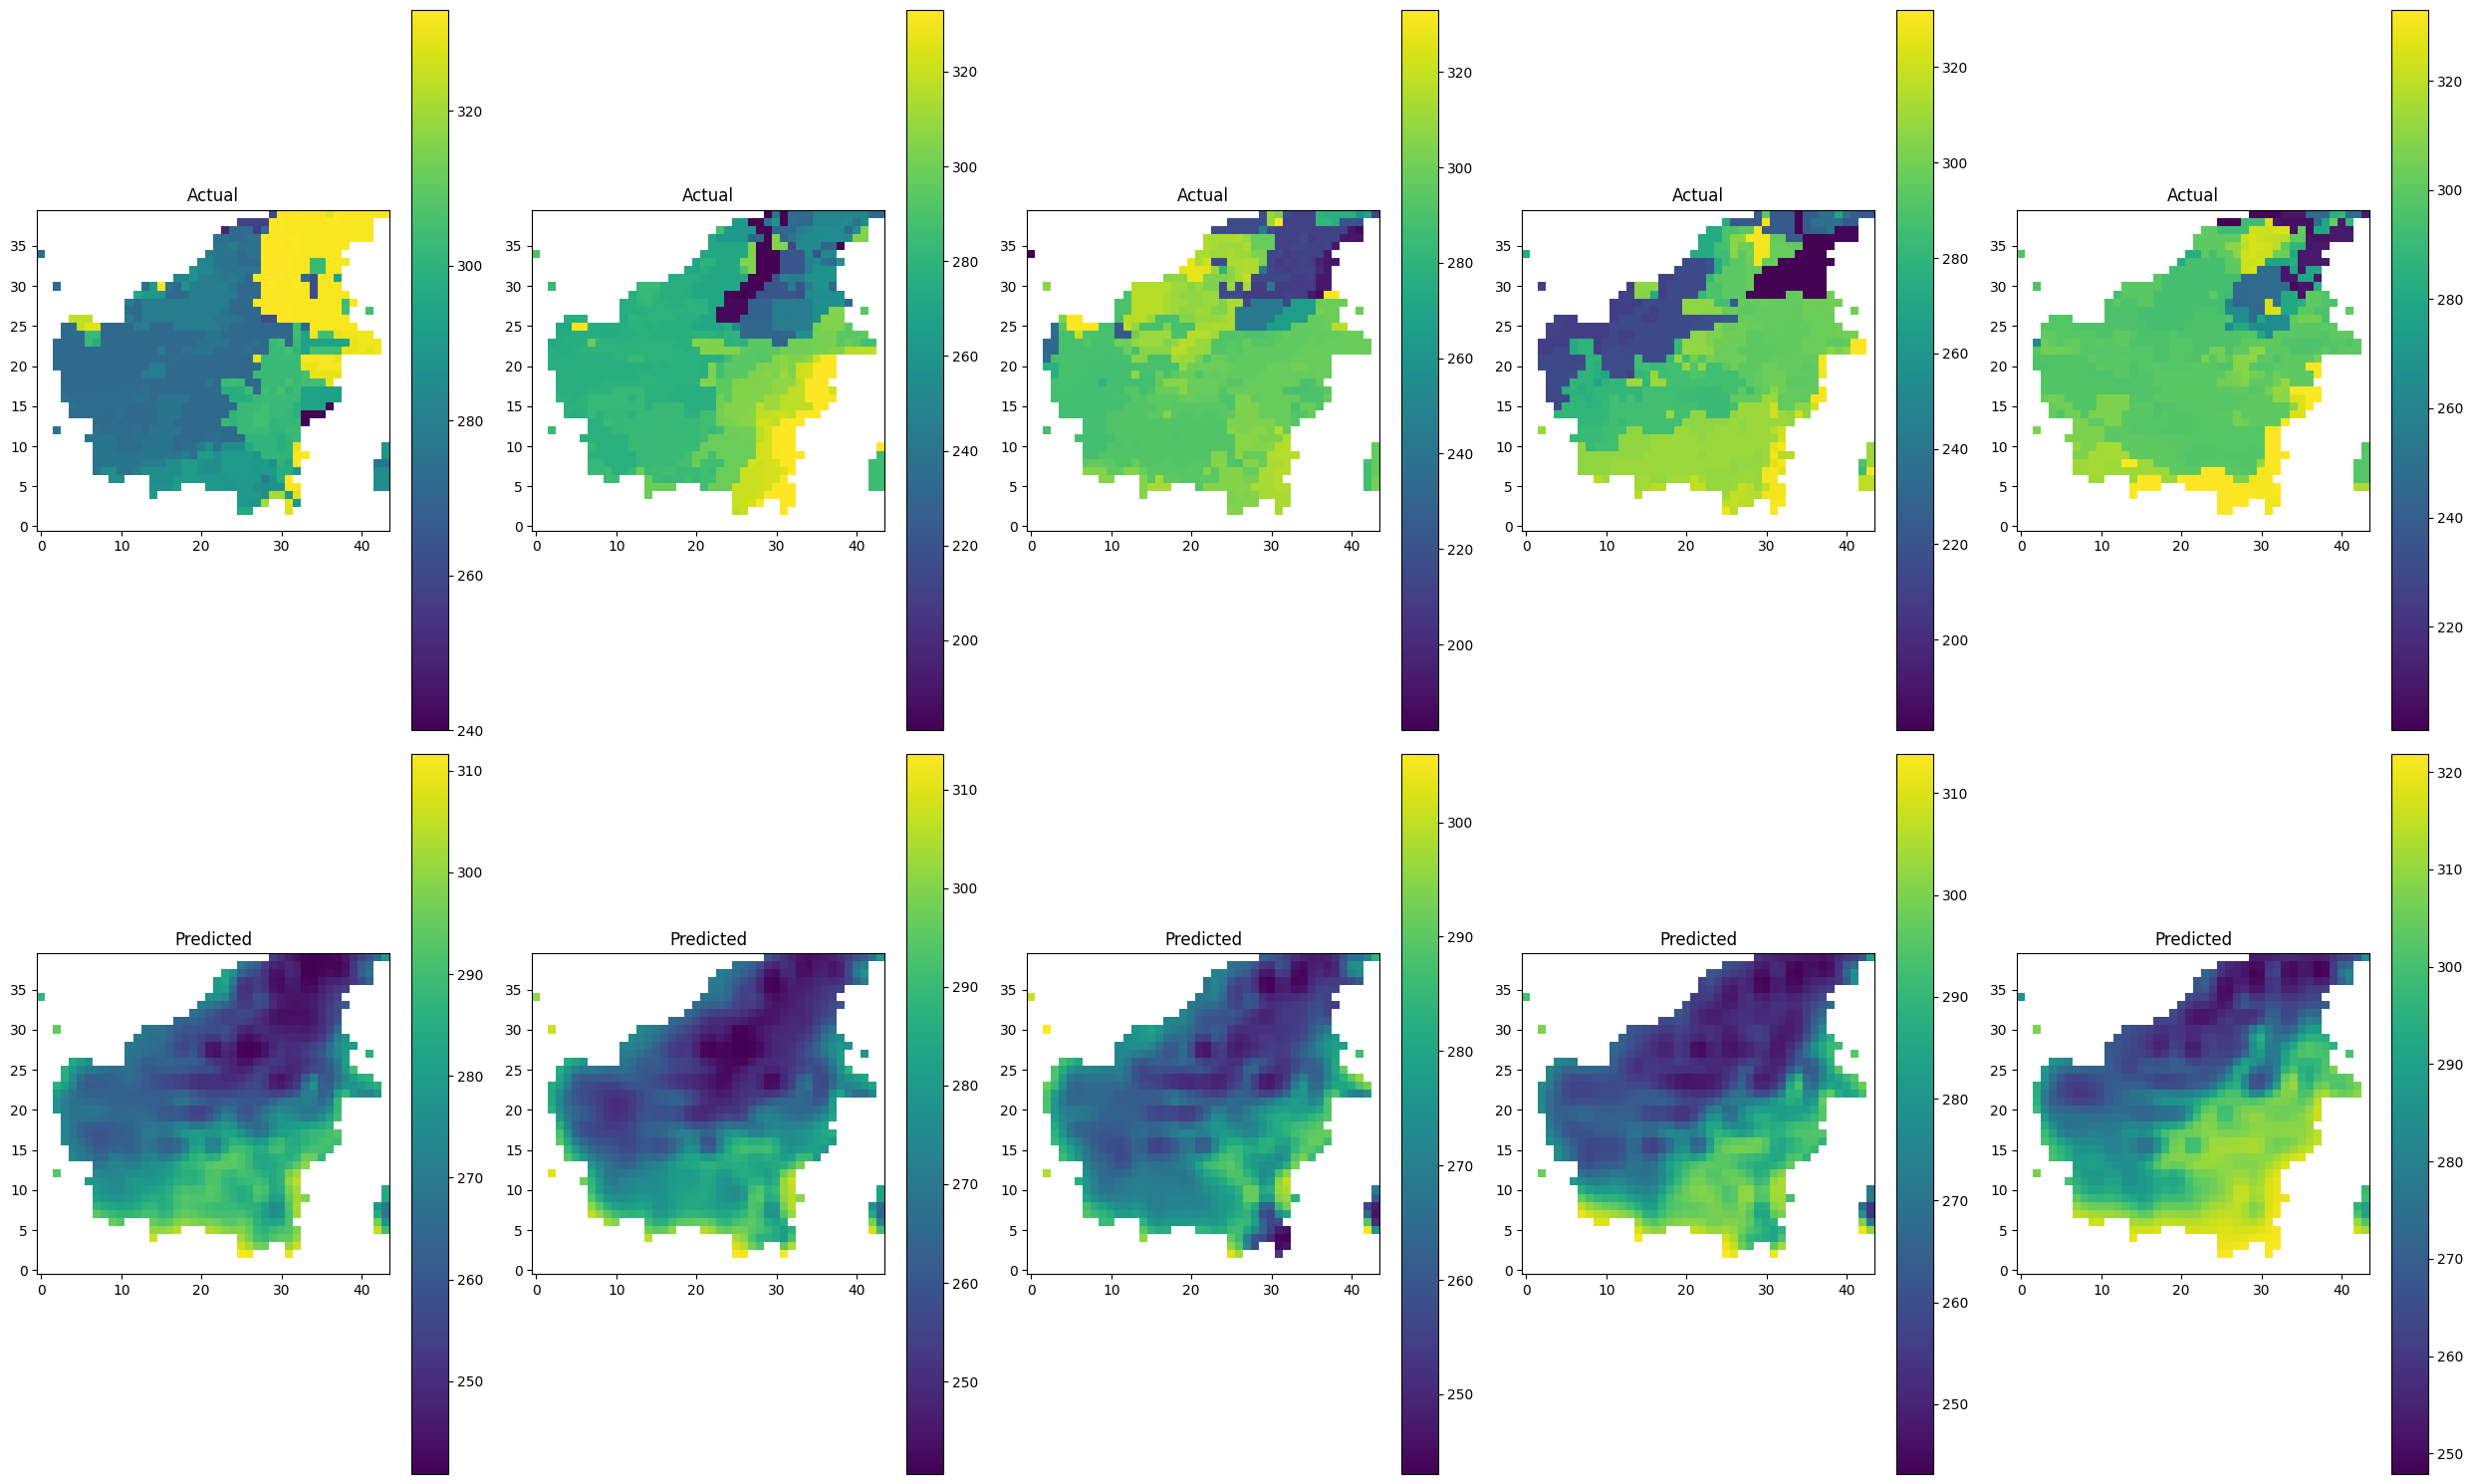

In [135]:
y_test_denormalized = y_test_denormalized.reshape(13,40,44)
predictions_denormalized = predictions_denormalized.reshape(13,40,44)
# Visualize some sample predictions
n_samples_to_plot = 5
plt.figure(figsize=(25, 15))
for i in range(n_samples_to_plot):
    plt.subplot(2, n_samples_to_plot, i + 1)
    plt.imshow(y_test_denormalized[i, :, :], cmap='viridis')
    plt.title('Actual')
    plt.colorbar()
    plt.gca().invert_yaxis()
    
    plt.subplot(2, n_samples_to_plot, n_samples_to_plot + i + 1)
    plt.imshow(predictions_denormalized[i, :, :], cmap='viridis')
    plt.title('Predicted')
    plt.colorbar()
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()